## CASE STUDY - NETWORK ANAMOLY DETECTION (BINOMIAL CLASSIFICATION)

BUSINESS CONTEXT:

With the enormous growth of computer networks usage and the huge increase in the number of Applications running on top of it, network security is becoming increasingly more important. All The computer systems suffer from security vulnerabilities which are both technically difficult and economically costly to be solved by the manufacturers. Therefore, the role of Intrusion Detection Systems (IDSs), as special-purpose devices to detect anomalies and attacks in the network, is Becoming more important. The research in the intrusion detection field has been mostly focused on anomaly-based and misusebased detection techniques for a long time. While misuse-based detection is generally favored in commercial products due to its predictability and high accuracy, in academic research anomaly detection is typically conceived as a more powerful method due to its theoretical potential for addressing novel attacks. Conducting a thorough analysis of the recent research trend in anomaly detection, one will encounter several machine learning methods reported to have a very high detection rate of 98% ,While keeping the false alarm rate at 1%. However, when we look at the state of the art IDS Solutions and commercial tools, there is no evidence of using anomaly detection approaches, and Practitioners still think that it is an immature technology. To find the reason of this contrast, lots of research was done done in anomaly detection and considered various aspects such as learning and detection approaches, training data sets, testing data sets, and evaluation methods.

In [151]:
#Importing Required modules for the Analysis

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys 
import time
import datetime
from sklearn import preprocessing
from scipy.special import boxcox1p
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import tree
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.decomposition import PCA
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import ensemble
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import pandas_profiling as pp
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys 
import time
import datetime
from sklearn import preprocessing
from scipy.special import boxcox1p
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import tree
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy
from sklearn.metrics import confusion_matrix
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from keras.callbacks import EarlyStopping


# Data preparation


In [4]:
# Reading Testing and Training txt file into pandas dataframe.

#Loading Training data

train = pd.read_csv('/home/arunn/Desktop/network analysis/train.txt', sep=",", header=None)


#Adding column names to the dataframe

train.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","attack","last_flag"]


#Loading Testing data

test = pd.read_csv('/home/arunn/Desktop/network analysis/test.txt', sep=",", header=None)

#Adding column names to the dataframe

test.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","attack","last_flag"]


In [5]:
#Merging train and test data since the varieties of Anomaly is not consistent across the datasets ( Train - Test data will be split after data preprocessing).

data = train.append(test)


In [6]:
#Dropping last_flag field which is irrelavant for the data analysis

data = data.drop(['last_flag'], axis = 1)


# Binomial classification

In [7]:
#code to classify values of 'attack' field as "normal" or "attack"

data.loc[data['attack'] != 'normal', 'attack'] = 'attack'

# Data preprocessing

In [8]:
#Viewing dataset
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [9]:
#summarizing datset
data.info()

#Inference: 
 
  #There is no null values in the dataset.
  #Protocol_type , service , flag are non numeric data hence to be encoded.
  #Target vaiable - 'attack' is non numeric data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Data columns (total 42 columns):
duration                       148517 non-null int64
protocol_type                  148517 non-null object
service                        148517 non-null object
flag                           148517 non-null object
src_bytes                      148517 non-null int64
dst_bytes                      148517 non-null int64
land                           148517 non-null int64
wrong_fragment                 148517 non-null int64
urgent                         148517 non-null int64
hot                            148517 non-null int64
num_failed_logins              148517 non-null int64
logged_in                      148517 non-null int64
num_compromised                148517 non-null int64
root_shell                     148517 non-null int64
su_attempted                   148517 non-null int64
num_root                       148517 non-null int64
num_file_creations             148517 n

In [10]:
#Describe the dataset

data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,183.928042,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,98.528328,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
#pandas profiling the dataset

pp.ProfileReport(data)

#INFERENCE:
 #It's a balanced dataset.
 #Rejecting due to multicollinearitty-  srv_rerror_rate, srv_serror_rate, dst_host_rerror_rate, dst_host_serror_rate , num_compromised, rerror_rate, serror_rate
 #Rejecting due to constant value - num_outbound_cmds
 #Fields with very high Zero value might affect the prediction hence to be scaled
 #EDA of Field wise records.

Number of variables,43
Number of observations,148517
Total Missing (%),0.0%
Total size in memory,48.7 MiB
Average record size in memory,344.0 B
Numeric,26
Categorical,4
Boolean,5
Date,0
Text (Unique),0
Rejected,8


In [11]:
#Removing fields with high collinearity or with the constant value

data = data.drop(['srv_rerror_rate', 'srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_serror_rate' , 'num_compromised', 'rerror_rate', 'serror_rate' , 'num_outbound_cmds'], axis = 1)

In [12]:
#Skewness of the data
print(data.skew())

#Inference:

#Attributes with highly skewed data - src_bytes,dst_bytes,land,urgent,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login   
#These values needs to be scaled and normalized.


duration                        12.396309
src_bytes                      206.681381
dst_bytes                      314.936960
land                            68.104700
wrong_fragment                  12.076773
urgent                         110.341618
hot                             13.969489
num_failed_logins               22.210001
logged_in                        0.396413
root_shell                      25.691188
su_attempted                    45.105246
num_root                       250.534357
num_file_creations              87.066078
num_shells                      77.873070
num_access_files                45.274654
is_host_login                  111.236984
is_guest_login                   8.846449
count                            1.593934
srv_count                        4.662507
same_srv_rate                   -0.633632
diff_srv_rate                    4.081981
srv_diff_host_rate               2.854192
dst_host_count                  -0.870274
dst_host_srv_count               0

In [13]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,255,26,0.10,0.05,0.00,0.00,1.00,0.00,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,30,255,1.00,0.00,0.03,0.04,0.01,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,normal


In [160]:
Hist = data

In [161]:
#Label encoding non numeric data

LE =  ['protocol_type', 'service', 'flag','attack']


for val in LE:
    categories= Hist[val].unique().tolist()
    Hist[val] = Hist[val].astype('category' ,categories)
    Hist[val] = Hist[val].cat.codes

In [135]:
#ONE HOT ENCODING the labelled data

OE = ['protocol_type', 'service', 'flag']


for val in OE:
   
    Hist[val] = Hist[val].astype('category',categories=Hist[val].unique().tolist())

    Hist = pd.get_dummies(Hist,prefix=[val],columns =[val])

/home/arunn/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [136]:
#Splitting predictor and target variables

x = Hist.drop(['attack'], axis = 1).values
y = Hist[['attack']].values


#Splitting train - test data

#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



In [137]:
#Scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# MODEL BUILDING

# Feed Forward Neural Network Model

In [150]:
#Classification 

classifier = Sequential()

# Input Layer
classifier.add(Dense(100,  activation = 'relu', input_dim = 114))

# Hidden Layers
classifier.add(Dense(100, activation = 'relu'))


classifier.add(Dense(100,  activation = 'relu'))

# Output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#early stopping to stop model training when there is no imporvement in loss
early_stopping_monitor = EarlyStopping(patience=2)


# Fitting with Train Data
classifier.fit(x_train, y_train, batch_size = 10, nb_epoch = 30, validation_split=0.3, callbacks=[early_stopping_monitor])

/home/arunn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  app.launch_new_instance()
/home/arunn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 83169 samples, validate on 35644 samples
Epoch 1/30
83169/83169 [==============================] - 53s 640us/step - loss: 0.0687 - acc: 0.9748 - val_loss: 0.0563 - val_acc: 0.9799
Epoch 2/30
83169/83169 [==============================] - 42s 511us/step - loss: 0.0446 - acc: 0.9837 - val_loss: 0.0474 - val_acc: 0.9837
Epoch 3/30
83169/83169 [==============================] - 56s 671us/step - loss: 0.0380 - acc: 0.9858 - val_loss: 0.0458 - val_acc: 0.9853
Epoch 4/30
83169/83169 [==============================] - 50s 606us/step - loss: 0.0355 - acc: 0.9870 - val_loss: 0.0389 - val_acc: 0.9861
Epoch 5/30
83169/83169 [==============================] - 49s 594us/step - loss: 0.0329 - acc: 0.9880 - val_loss: 0.0374 - val_acc: 0.9856
Epoch 6/30
83169/83169 [==============================] - 50s 604us/step - loss: 0.0314 - acc: 0.9881 - val_loss: 0.0385 - val_acc: 0.9872
Epoch 7/30
83169/83169 [==============================] - 54s 652us/step - loss: 0.0292 - acc: 0.9892 - val_loss: 0.

In [154]:
#predicting with test data
y_pred = classifier.predict(x_test)

#setting threshold to distinguish the output
y_pred = (y_pred > 0.5)


#plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Measure of the classification model
print("Accuracy : "+ str(((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100))
precision = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
print("Precision : "+ str(precision))
recall = (cm[1,1]/(cm[0,1]+cm[1,1]))*100
print("Recall   : "+ str(recall))
print("False Positive : "+ str((cm[1,0]/(cm[0,0]+cm[1,0]))*100))
print("F-score : "+ str((2*(precision*recall)/(precision+recall))))
from math import log
print("Entropy : "+ str(-precision*log(precision)))



Accuracy : 99.01360086183679
Precision : 98.81779798635921
Recall   : 99.27564604541895
False Positive : 1.265646731571627
F-score : 99.04619290992544
Entropy : -453.89759082753505


In [156]:
#Plotting AUC - ROC Classifier:
y_pred_keras = classifier.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

auc_keras = auc(fpr_keras, tpr_keras)

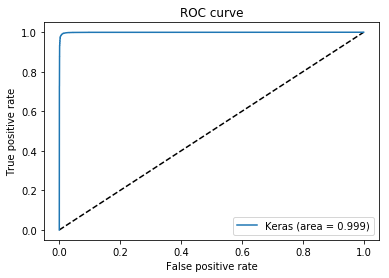

In [157]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [159]:
#Importing the model

from keras.models import load_model
classifier.save('/home/arunn/Desktop/network analysis/FFNN_BC.h5')

#Loading the model

#my_model = load_model('my_model.h5')

# LongShortTermMemory RecursiveNeuralNetwork

In [123]:
#reshaping input to feed into LSTM
trainX = numpy.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
testX = numpy.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [126]:
#Classification

model = Sequential()

#Input layer
model.add(LSTM(6, input_shape=(1, 114)))

#Hidden layers
model.add(Dense(100 , activation='relu'))
model.add(Dense(100 , activation='relu'))
model.add(Dense(100 , activation='relu'))
model.add(Dense(100 , activation='relu'))

#Output layer
model.add(Dense(1 , activation='sigmoid'))

#Compiling
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

#Fitting with training data
model.fit(trainX, y_train, epochs=35)#epochs = 20

# Final evaluation of the model
scores = model.evaluate(testX, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 6)                 2904      
_________________________________________________________________
dense_69 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_70 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_71 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_72 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 101       
Total params: 34,005
Trainable params: 34,005
Non-trainable params: 0
_________________________________________________________________
None
E

In [129]:
#predicting with test data
y_pred = model.predict(testX)

#setting threshold to distinguish the output
y_pred = (y_pred > 0.5)


#plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Measure of the classification model
print("Accuracy : "+ str(((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100))
precision = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
print("Precision : "+ str(precision))
recall = (cm[1,1]/(cm[0,1]+cm[1,1]))*100
print("Recall   : "+ str(recall))
print("False Positive : "+ str((cm[1,0]/(cm[0,0]+cm[1,0]))*100))
print("F-score : "+ str((2*(precision*recall)/(precision+recall))))
from math import log
print("Entropy : "+ str(-precision*log(precision)))



Accuracy : 99.11796391058442
Precision : 98.95420591101008
Recall   : 99.34137593739811
False Positive : 1.1204676734637067
F-score : 99.14741295151319
Entropy : -454.6606523400385


In [130]:
#Plotting AUC - ROC Classifier:
y_pred_keras = model.predict(testX).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

auc_keras = auc(fpr_keras, tpr_keras)

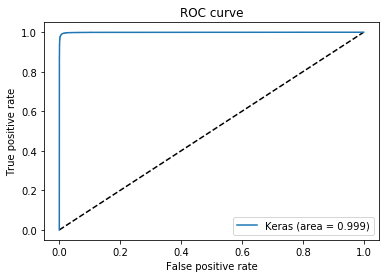

In [131]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [132]:
#Importing the model

from keras.models import load_model
model.save('/home/arunn/Desktop/network analysis/LSTM_BC.h5')

#Loading the model

#my_model = load_model('my_model.h5')